In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


In [3]:
# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# html = browser.html
# html_soup = soup(html, 'html.parser')

In [4]:
# Scrape the data in HTML table using Pandas
df=pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
# Assemble the scraped data into a DataFrame
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
# Examine the data types and convert if necessary
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
# Change terrestrial_date to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
#Check the format for date didn't change
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# Check how many months exist on Mars
month_mars = mars_df['month'].nunique()
print("How many months exist on Mars?")
print(" ")
print(f"There exist {month_mars} months in Mars.")

How many months exist on Mars?
 
There exist 12 months in Mars.


In [10]:
# How many Many Martian days worth of data exist in the DF
days_mars = mars_df['sol'].nunique()
print("How many Martian days worth of data exist in the scraped dataset?")
print(" ")
print(f"There are {days_mars} Martian days worth of data.")

How many Martian days worth of data exist in the scraped dataset?
 
There are 1867 Martian days worth of data.


In [11]:
# What are the coldest and warmest months on Mars
avg_df_t = mars_df.groupby(by='month')['min_temp'].mean()
avg_df_t

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [12]:

coldest_month = avg_df_t.idxmin()
warmest_month = avg_df_t.idxmax()

print("What are the coldest and warmest months on Mars?")
print(" ")
print(f"The coldest month is the {coldest_month} month, and the warmest is the {warmest_month} month .")

What are the coldest and warmest months on Mars?
 
The coldest month is the 3 month, and the warmest is the 8 month .


In [13]:
# To double check answer above

avg_df_t.sort_values(ascending = False)

month
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
7    -72.281690
12   -74.451807
6    -75.299320
1    -77.160920
5    -79.308725
2    -79.932584
4    -82.747423
3    -83.307292
Name: min_temp, dtype: float64

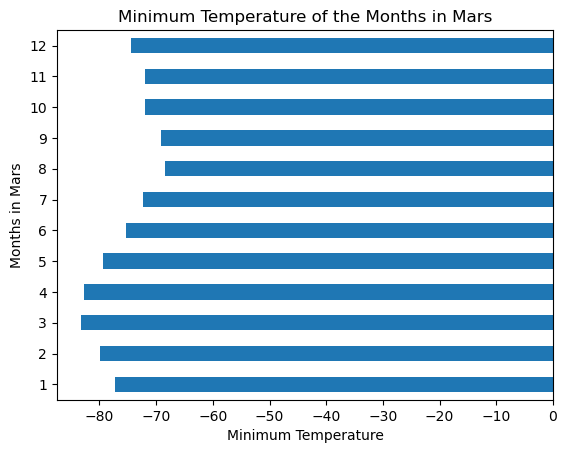

In [14]:
# Bar chart plot of minimum temperature averages
import matplotlib.pyplot as plot

avg_df_t.plot.barh(title='Minimum Temperature of the Months in Mars')
plot.xlabel('Minimum Temperature')
plot.ylabel('Months in Mars')
plot.savefig('Min_Temp_Months.png')
plot.show()


In [15]:
# What are the coldest and warmest months on Mars
avg_df_p = mars_df.groupby(by='month')['pressure'].mean()
avg_df_p

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [16]:
lowest_pressure = avg_df_p.idxmin()
highest_pressure = avg_df_p.idxmax()

print("What months have the lowest and highest atmospheric pressure on Mars?")
print(" ")
print(f"The month with the lowest atmospheric pressure is the {lowest_pressure} month,and the month with the highest is the {highest_pressure} month .")

What months have the lowest and highest atmospheric pressure on Mars?
 
The month with the lowest atmospheric pressure is the 6 month,and the month with the highest is the 9 month .


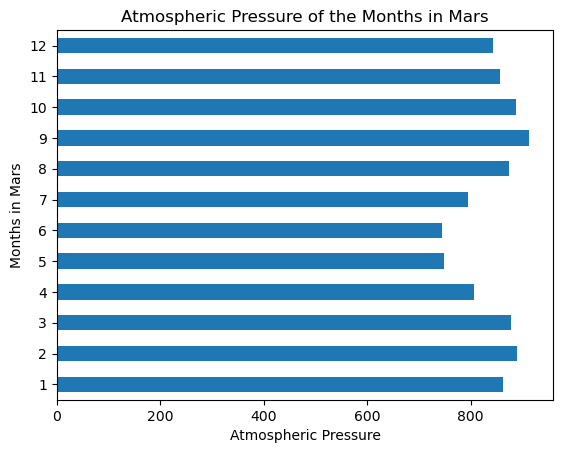

In [17]:
# Bar chart plot of minimum temperature averages
import matplotlib.pyplot as plot

avg_df_p.plot.barh(title='Atmospheric Pressure of the Months in Mars')
plot.xlabel('Atmospheric Pressure')
plot.ylabel('Months in Mars')
plot.savefig('Atm_Press_Months.png')
plot.show()


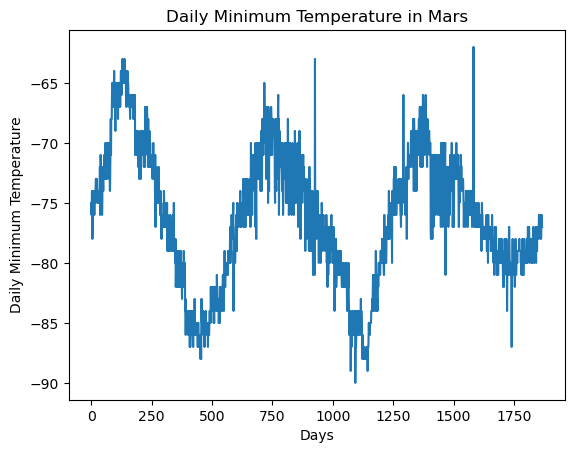

In [18]:
daily_temp = mars_df['min_temp']

daily_temp.plot(title='Daily Minimum Temperature in Mars')
plot.xlabel('Days')
plot.ylabel('Daily Minimum Temperature')
plot.savefig('Daily_Min_Temp.png')
plot.show()


In [19]:
print("About how many terrestrial (Earth) days exist in a Martian year?")
print(" ")
print(f"There are approximately 680 terrestrial days in a Martian year.")

About how many terrestrial (Earth) days exist in a Martian year?
 
There are approximately 680 terrestrial days in a Martian year.


In [20]:
mars_df.to_csv('mars_data.csv')

In [21]:
browser.quit() 